In [1]:
import json
import statistics

import seaborn as sns

from valerie.data import Article
from valerie.modeling import SourceModel

/Users/jay/.pyenv/versions/3.7.5/envs/valerie/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Phase 1
---

In [2]:
with open("data/phase2/all_data/articles.json") as fi:
    articles = [Article.from_dict(article) for article in json.load(fi).values()]

In [3]:
model = SourceModel.analyze(articles)
len(model)

7724

In [4]:
counter = list(sorted(model.items(), key=lambda x: x[1], reverse=True))
total_sources = len(counter)
total_sources

7724

In [5]:
counts = [v for v in model.values() for i in range(v)]
total_articles = len(counts)
total_articles

53299

In [6]:
for x in [10, 20, 50, 100, 200, 500, 1000, 2500]:
    percent_sources = x / total_sources*100
    percent_articles = sum([x[1] for x in counter[:x]]) / total_articles*100
    print(f"the top {x:4} sources ({percent_sources:5.2f}%) make up {percent_articles:.2f}% of articles")

the top   10 sources ( 0.13%) make up 18.96% of articles
the top   20 sources ( 0.26%) make up 27.70% of articles
the top   50 sources ( 0.65%) make up 40.72% of articles
the top  100 sources ( 1.29%) make up 51.21% of articles
the top  200 sources ( 2.59%) make up 61.65% of articles
the top  500 sources ( 6.47%) make up 73.38% of articles
the top 1000 sources (12.95%) make up 80.78% of articles
the top 2500 sources (32.37%) make up 89.20% of articles


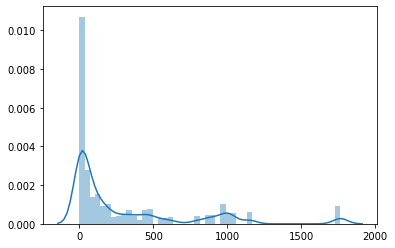

In [7]:
sns.distplot(counts)

In [8]:
counter[:20]

[('nytimes', 1765),
 ('cnn', 1150),
 ('jsonline', 1027),
 ('senate', 1022),
 ('state', 977),
 ('whitehouse', 971),
 ('tampabay', 896),
 ('google', 870),
 ('politico', 790),
 ('house', 635),
 ('wsj', 571),
 ('foxnews', 549),
 ('usatoday', 493),
 ('reuters', 475),
 ('go', 464),
 ('census', 458),
 ('thehill', 449),
 ('npr', 431),
 ('bls', 391),
 ('opensecrets', 381)]

In [9]:
counter[-10:]

[('tnlottery', 1),
 ('takuwaniriime', 1),
 ('g-a-i', 1),
 ('gunsamerica', 1),
 ('lindsaynielson', 1),
 ('digitaltrends', 1),
 ('ihexecutive', 1),
 ('current', 1),
 ('votetexas', 1),
 ('gvnews', 1)]

In [10]:
print("max:\t", max(model.values()))
print("mean:\t", sum(model.values())/len(model))
print("median:\t", statistics.median(model.values()))

max:	 1765
mean:	 6.900440186431901
median:	 1.0


# model

In [11]:
model = SourceModel()
model.train(articles)

In [12]:
for i in range(10):
    print(model.predict(articles[i]))

0.0
0.0
1.0
0.2
0.15
1.0
1.0
0.0
0.0
1.0


In [13]:
scores = [model.predict(x) for x in articles]

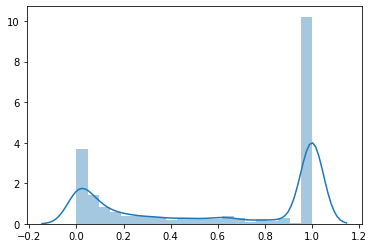

In [14]:
sns.distplot(scores)

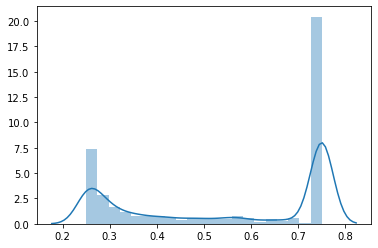

In [15]:
sns.distplot([s/2 + 0.25 for s in scores])

In [16]:
model.save_pretrained("logs/sourcemodel.json")

In [17]:
_model = SourceModel.from_pretrained("logs/sourcemodel.json")

In [23]:
_model.model["nyc"]

18